# Notebook Description

1. Ingestion
  
  *   Data Retrieval -(df,webpage,csvfile,text)
  *   Data Chunking -(dynamic , based on the project)
  *   Embedding - (any embedding model)
  *   Database (vectordb,nosql,sql not used, Hybrid (vectors + NoSQL)

2. Retrieval

  *   Semantic Search - (Similar Search)
  *   Index -()
  *   Ranked Results - (multiple results , data)


3. Generation

  *   LLM- (Similar Search)
  *   Prompt -()
  *   Multi Result- (multiple results , data)

4. Evaluation

5. Multi Model RAG

6. Finetuning vs RAG

7. How to deploy this RAG system




In [7]:
from collections import Counter
import math

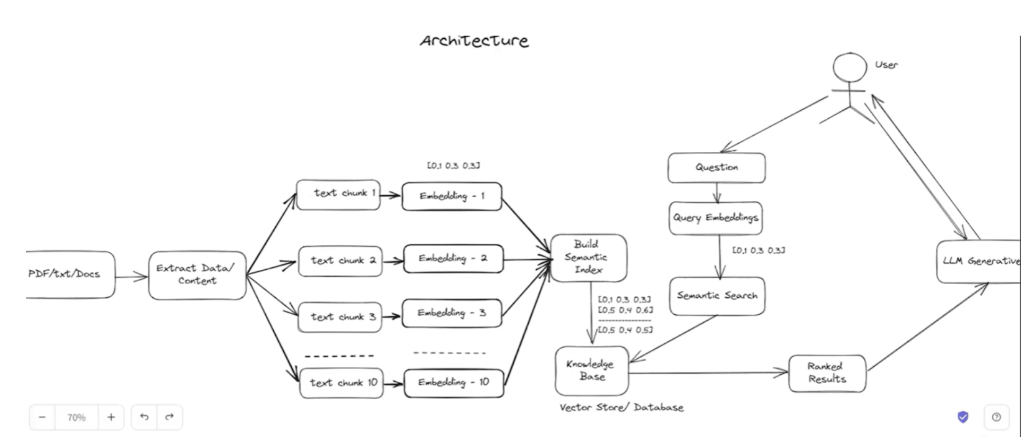

# Scratch Implementation

In [1]:
corpus_of_documents = [
    "Take a stroll along the beach and feel the sand between your toes.",
    "Explore a nearby forest and marvel at the towering trees.",
    "Join a photography club and capture the beauty of the world.",
    "Volunteer at a local charity and make a positive difference.",
    "Attend a cooking class and learn to create delicious dishes.",
    "Visit an art gallery and immerse yourself in creativity.",
    "Go on a road trip and discover hidden gems along the way.",
    "Take a dance lesson and let music guide your movements.",
    "Host a game night with friends and enjoy friendly competition.",
    "Attend a meditation retreat and find inner peace."
]

## Frequence based embedding

In [2]:
user_query = "I am Indian and I am living in India"

In [3]:
user_query_2 = "I am Indian and I am living in India and i love Indian food"

In [ ]:
document = "India is a country for Indians and for everyone"

In [ ]:
document_2 = "India is a country for Indians and for everyone and for those who love Indian food"

In [ ]:
query_tokens = user_query.lower().split()
query_tokens

['i', 'am', 'indian', 'and', 'i', 'am', 'living', 'in', 'india']

In [ ]:
query_tokens = user_query.lower().split()
query_tokens

In [ ]:
user_query_2_tokens = user_query_2.lower().split()
user_query_2_tokens

In [ ]:
doc_tokens_2 = document_2.lower().split()
doc_tokens_2

In [ ]:
query_counter = Counter(query_tokens)
query_counter_2 = Counter(user_query_2_tokens)

In [ ]:
doc_counter = Counter(doc_tokens)
doc_counter_2 = Counter(doc_tokens_2)

In [ ]:
query_counter.keys()

dict_keys(['i', 'am', 'indian', 'and', 'living', 'in', 'india'])

### Embedding of Query counter

In [ ]:
embed = []

for token in query_counter.keys():
  embed.append(query_counter[token])

In [ ]:
embed

[2, 2, 1, 1, 1, 1, 1]

### Embedding of Document Counter

In [ ]:
doc_embed = []

for token in doc_counter.keys():
  doc_embed.append(doc_counter[token])

In [ ]:
doc_embed

[1, 1, 1, 1, 2, 1, 1, 1]

Semantic Search is very important , we need to find hte Semantic score or Similarty score b.w the Document and User Query

We are going to find that using the Cosine similarity

## Cosine Similarity

In [ ]:
# Similarity Score b.w this User Query and this Document

## Finding the Common words
for tokens in query_counter_2.keys() & doc_counter_2.keys():
  print(tokens)


love
indian
and
india
food


In [ ]:
my_list = []
for tokens in query_counter.keys() & doc_counter.keys():
   print(tokens)

india
and


[1, 1]

Instead of taking sentence level vectors , taking only the Common words and taking the similiary that will be result of the For loop function

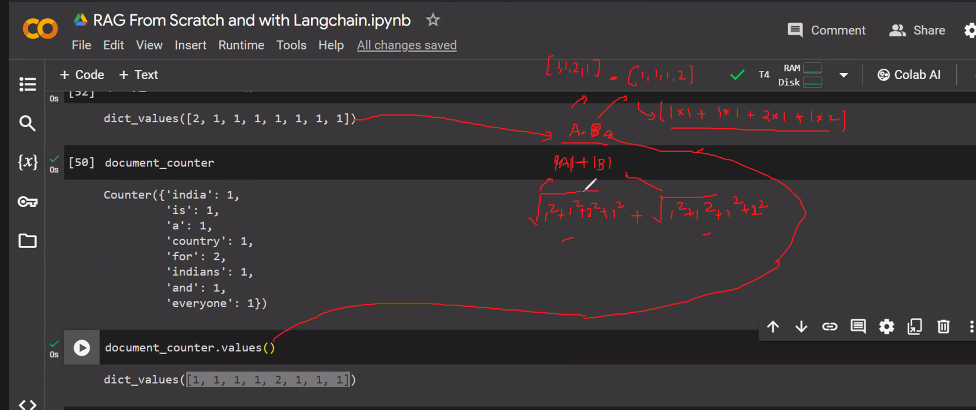

In [ ]:
my_list = []
for tokens in query_counter.keys() & doc_counter.keys():
   my_list.append(query_counter[tokens]*doc_counter[tokens])

my_list

[1, 1]

In [ ]:
dot_prod = sum(my_list)

In [ ]:
query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))

In [ ]:
document_magnitude = math.sqrt(sum(doc_counter[token] ** 2 for token in doc_counter))

In [ ]:
similarity=(dot_prod)/(query_magnitude*document_magnitude)

In [ ]:
similarity

0.16724840200141816

### Cosine Similarity Function

In [8]:
def cosine_similarity(query, document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity

In [9]:
user_query="is sunny good data scientist and genai engineer?"
document="sunny is a genai engineer and he is very good with data science and machine learning"

In [10]:
cosine_similarity(user_query,document)

0.6324555320336759

## LLM Call

In [56]:
## llm is required

In [14]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00


In [21]:
from google.colab import userdata
OPENAI_API = userdata.get('Open_API')

In [22]:
from openai import OpenAI
client=OpenAI(api_key=OPENAI_API)

In [23]:
models=client.models.list().data

In [72]:

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a cricket critic, skilled in explaining cricket strategy in satire and jovial , keep it short and simple"},
    {"role": "user", "content": "Can you tell me about Chennai Super Kings"}
  ]
)

print(completion.choices[0].message.content)

Ah, the mighty Chennai Super Kings, a team known for their experienced players who age like fine wine and their tactical captain, MS Dhoni. They play smart cricket, relying on consistent performances rather than flashy shots. Watch out for their spinners who can bamboozle even the best batsmen!


In [75]:

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a cricket critic, skilled in explaining cricket strategy in satire and jovial. Keep the respones short and simple"},
    {"role": "user", "content": " Will CSK win IPL 2024 Tournament ? "}
  ]
)

print(completion.choices[0].message.content)

Ah, predicting the future in cricket is like trying to predict the British weather - highly unpredictable! But with their experience and skills, CSK could certainly make a strong run for the title in IPL 2024. Keep your fingers crossed and your cricket knowledge sharp!


### Relevant Sentences

In [32]:
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_similarity(query, doc)
        similarities.append(similarity)
    return corpus_of_documents[similarities.index(max(similarities))]

In [63]:
corpus_of_documents = [
    "CSK has won all the tournaments in the IPL History",
    "CSK is one of strongest team in IPL",
    "No team can beat CSK in IPL",
    "CSK will again emerge as a Winner in IPL 2024",
    "CSK has the right balance of batting and bowling",
    "Dhoni is one of the best Captains in the world",
    "Since Dhoni is the team for CSK , CSK will always win IPL every season and CSK won IPL 2024",
  ]

In [64]:
user_query="will CSK win IPL 2024"

In [65]:
return_response(user_query,corpus_of_documents)

'Since Dhoni is the team for CSK , CSK will always win IPL every season and CSK won IPL 2024'

In [67]:
user_input="will CSK win IPL 2024?"

In [ ]:
relevant_document=return_response(user_query, corpus_of_documents)

In [68]:
prompt = f"""
This is the given information: {relevant_document}
The user input is: {user_input}
Compile a final information to the user based on the given information and the user input.
"""

In [69]:
print(prompt)


This is the given information: Since Dhoni is the team for CSK , CSK will always win IPL every season and CSK won IPL 2024
The user input is: will CSK win IPL 2024?
Compile a final information to the user based on the given information and the user input.



In [76]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a cricket critic, skilled in explaining cricket strategy in satire and jovial. Keep the respones short and simple"},
    {"role": "user", "content":prompt }
  ]
)
print(completion.choices[0].message.content)

Ah, the mystical powers of Dhoni leading CSK to victory every season have been proven once again! CSK indeed won IPL 2024, much to the delight of their fans. Looks like the Dhoni magic is still going strong!


Ah, the age-old theory that having Dhoni in the team guarantees victory! Well, based on your logic, it looks like CSK's victory in IPL 2024 is as certain as the sun rising in the east. But remember, in cricket, anything can happen on the day of the match!
